<a href="https://colab.research.google.com/github/zhanyao17/ODL/blob/main/BreastCancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# dataset for classification
cancer = load_breast_cancer()
# cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancer.data.shape

(569, 30)

In [2]:
# Convert numpyt array to pandas dataframe
data = pd.DataFrame(cancer.data,columns = cancer.feature_names)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Create new target col
data['Target'] = cancer.target

In [ ]:
data.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [4]:
# split the data into features variables (X) and target variables (Y)
X = data.drop('Target',axis = 1)
Y = data['Target']

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int64

In [ ]:
Y.value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state=2)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (426, 30)
y_train shape:  (426,)
X_test shape:  (143, 30)
y_test shape:  (143,)


In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense # using in the liner equation

In [8]:
# building the sequential model
L1 = 100
L2 = 100
model = Sequential()
model.add(Dense(L1,input_dim=30,activation = 'relu')) # linear equation for the ANN and there are L1 of nuerons (hidden layers)
model.add(Dense(L2,activation='relu')) # (hidden layers)
model.add(Dense(1,activation='sigmoid')) # output layer 0 to 1

In [9]:
# compiling the sequential model
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [10]:
# training the model for 10 epoches
history = model.fit(X_train,y_train,epochs=10,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/10
27/27 [==============================] - 1s 11ms/step - loss: 0.2903 - accuracy: 0.9366 - val_loss: 0.1444 - val_accuracy: 0.9441
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9648 - val_loss: 0.1022 - val_accuracy: 0.9720
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9859 - val_loss: 0.0918 - val_accuracy: 0.9650
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9859 - val_loss: 0.0884 - val_accuracy: 0.9580
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9883 - val_loss: 0.0879 - val_accuracy: 0.9580
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0968 - val_accuracy: 0.9441
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.0935 - val_accuracy: 0.9580
Epoch 8/10
27/27 [=

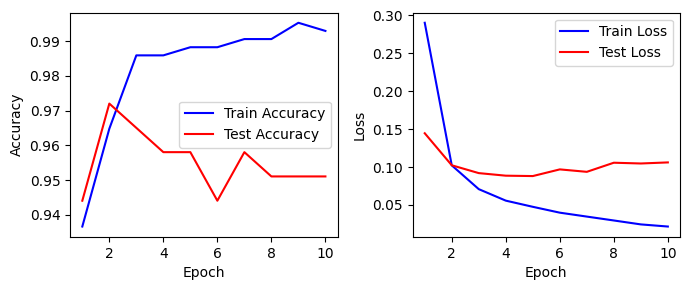

In [11]:
# Visualization on the result
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [12]:
# Classification on y_test dataset
pred = model.predict(X_test)
y_pred = (pred>0.5)


5/5 [==============================] - 0s 3ms/step


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.98      0.94      0.96        87

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[54  2]
 [ 5 82]]


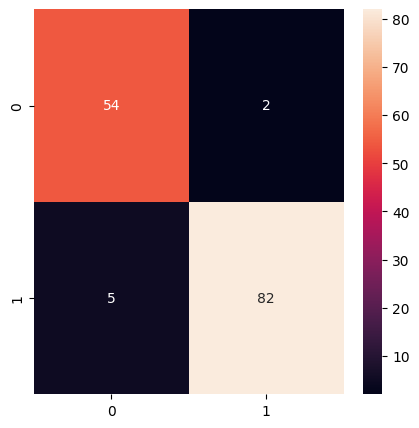

In [20]:
import seaborn as sns
plt.figure(figsize=[5,5])
sns.heatmap(cm,annot=True)
plt.show()

In [21]:
model.summary()
'''
the 100 is the error bias added by default
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13301 (51.96 KB)
Trainable params: 13301 (51.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
